Importing Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Reading Dataset

In [2]:
df = pd.read_csv("/content/WineQT.csv")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

Analyzing the Data

In [4]:
df.shape

(1143, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Checking Columns:

In [8]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'Id']

Checking Missing Values

In [9]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Checking for the duplicate values

In [10]:
df.nunique()

,0
fixed acidity,91
volatile acidity,135
citric acid,77
residual sugar,80
chlorides,131
free sulfur dioxide,53
total sulfur dioxide,138
density,388
pH,87
sulphates,89


count of the wine with its quality rate.

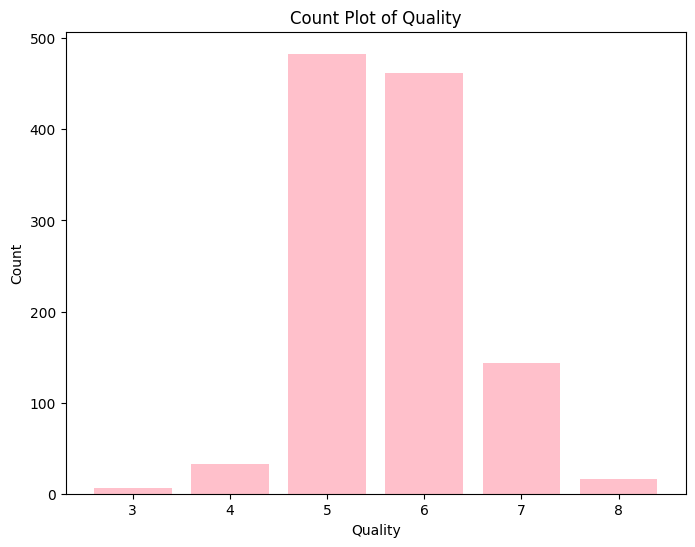

In [17]:
quality_counts = df['quality'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts, color='pink')
plt.title('Count Plot of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

Kernel density plot for understanding variance in the dataset

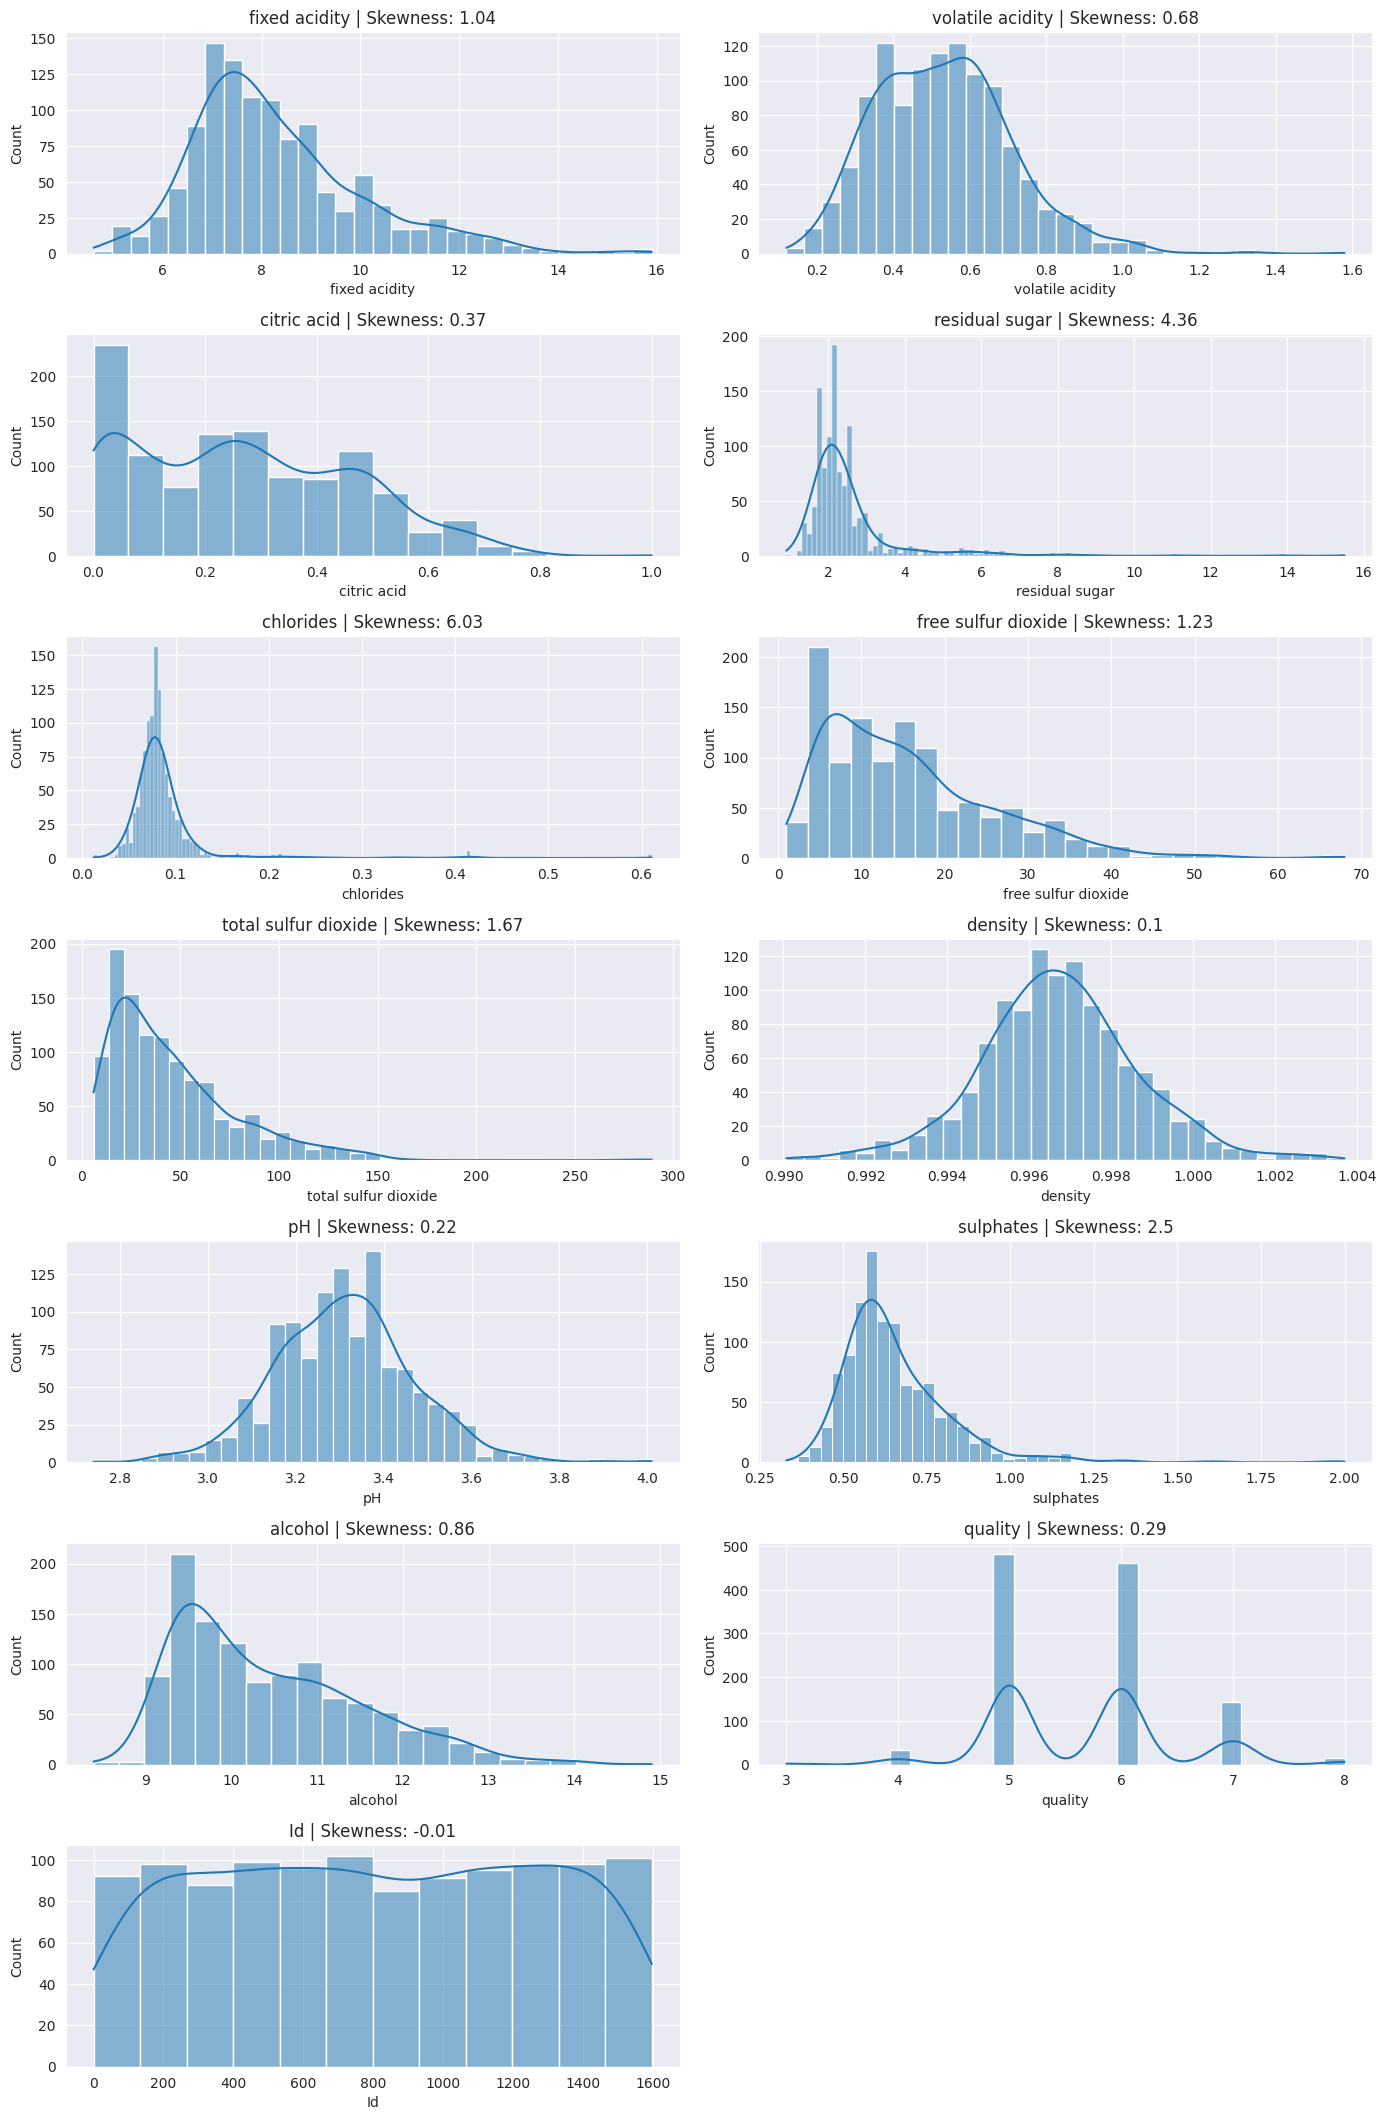

In [18]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

Swarm Plot for showing the outlier in the data

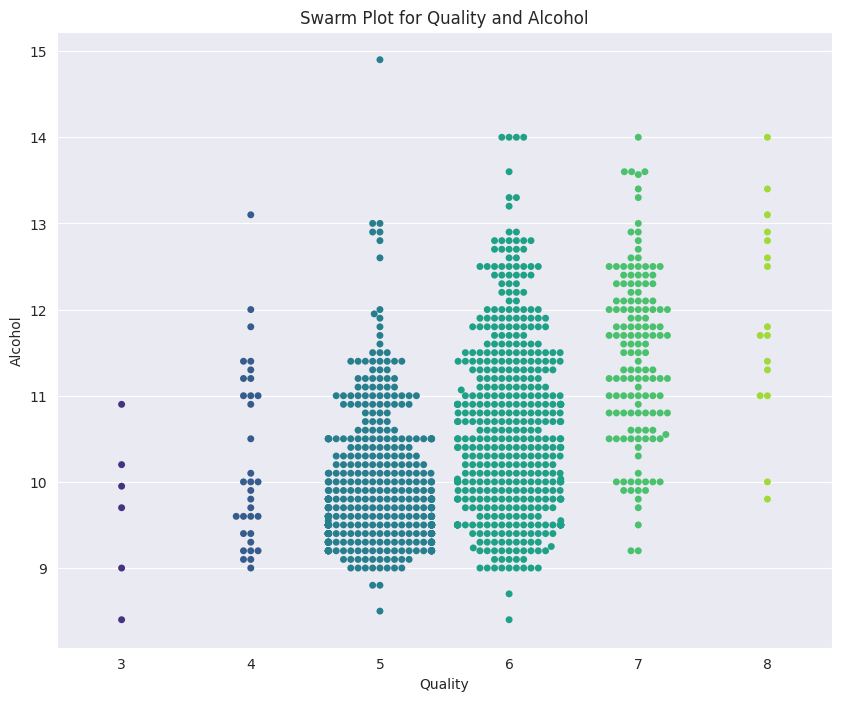

In [19]:
plt.figure(figsize=(10, 8))

sns.swarmplot(x="quality", y="alcohol", data=df, palette='viridis')

plt.title('Swarm Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

 Bivariate Analysis for (understanding variable interactions and correlations effectively)

<Figure size 1000x600 with 0 Axes>

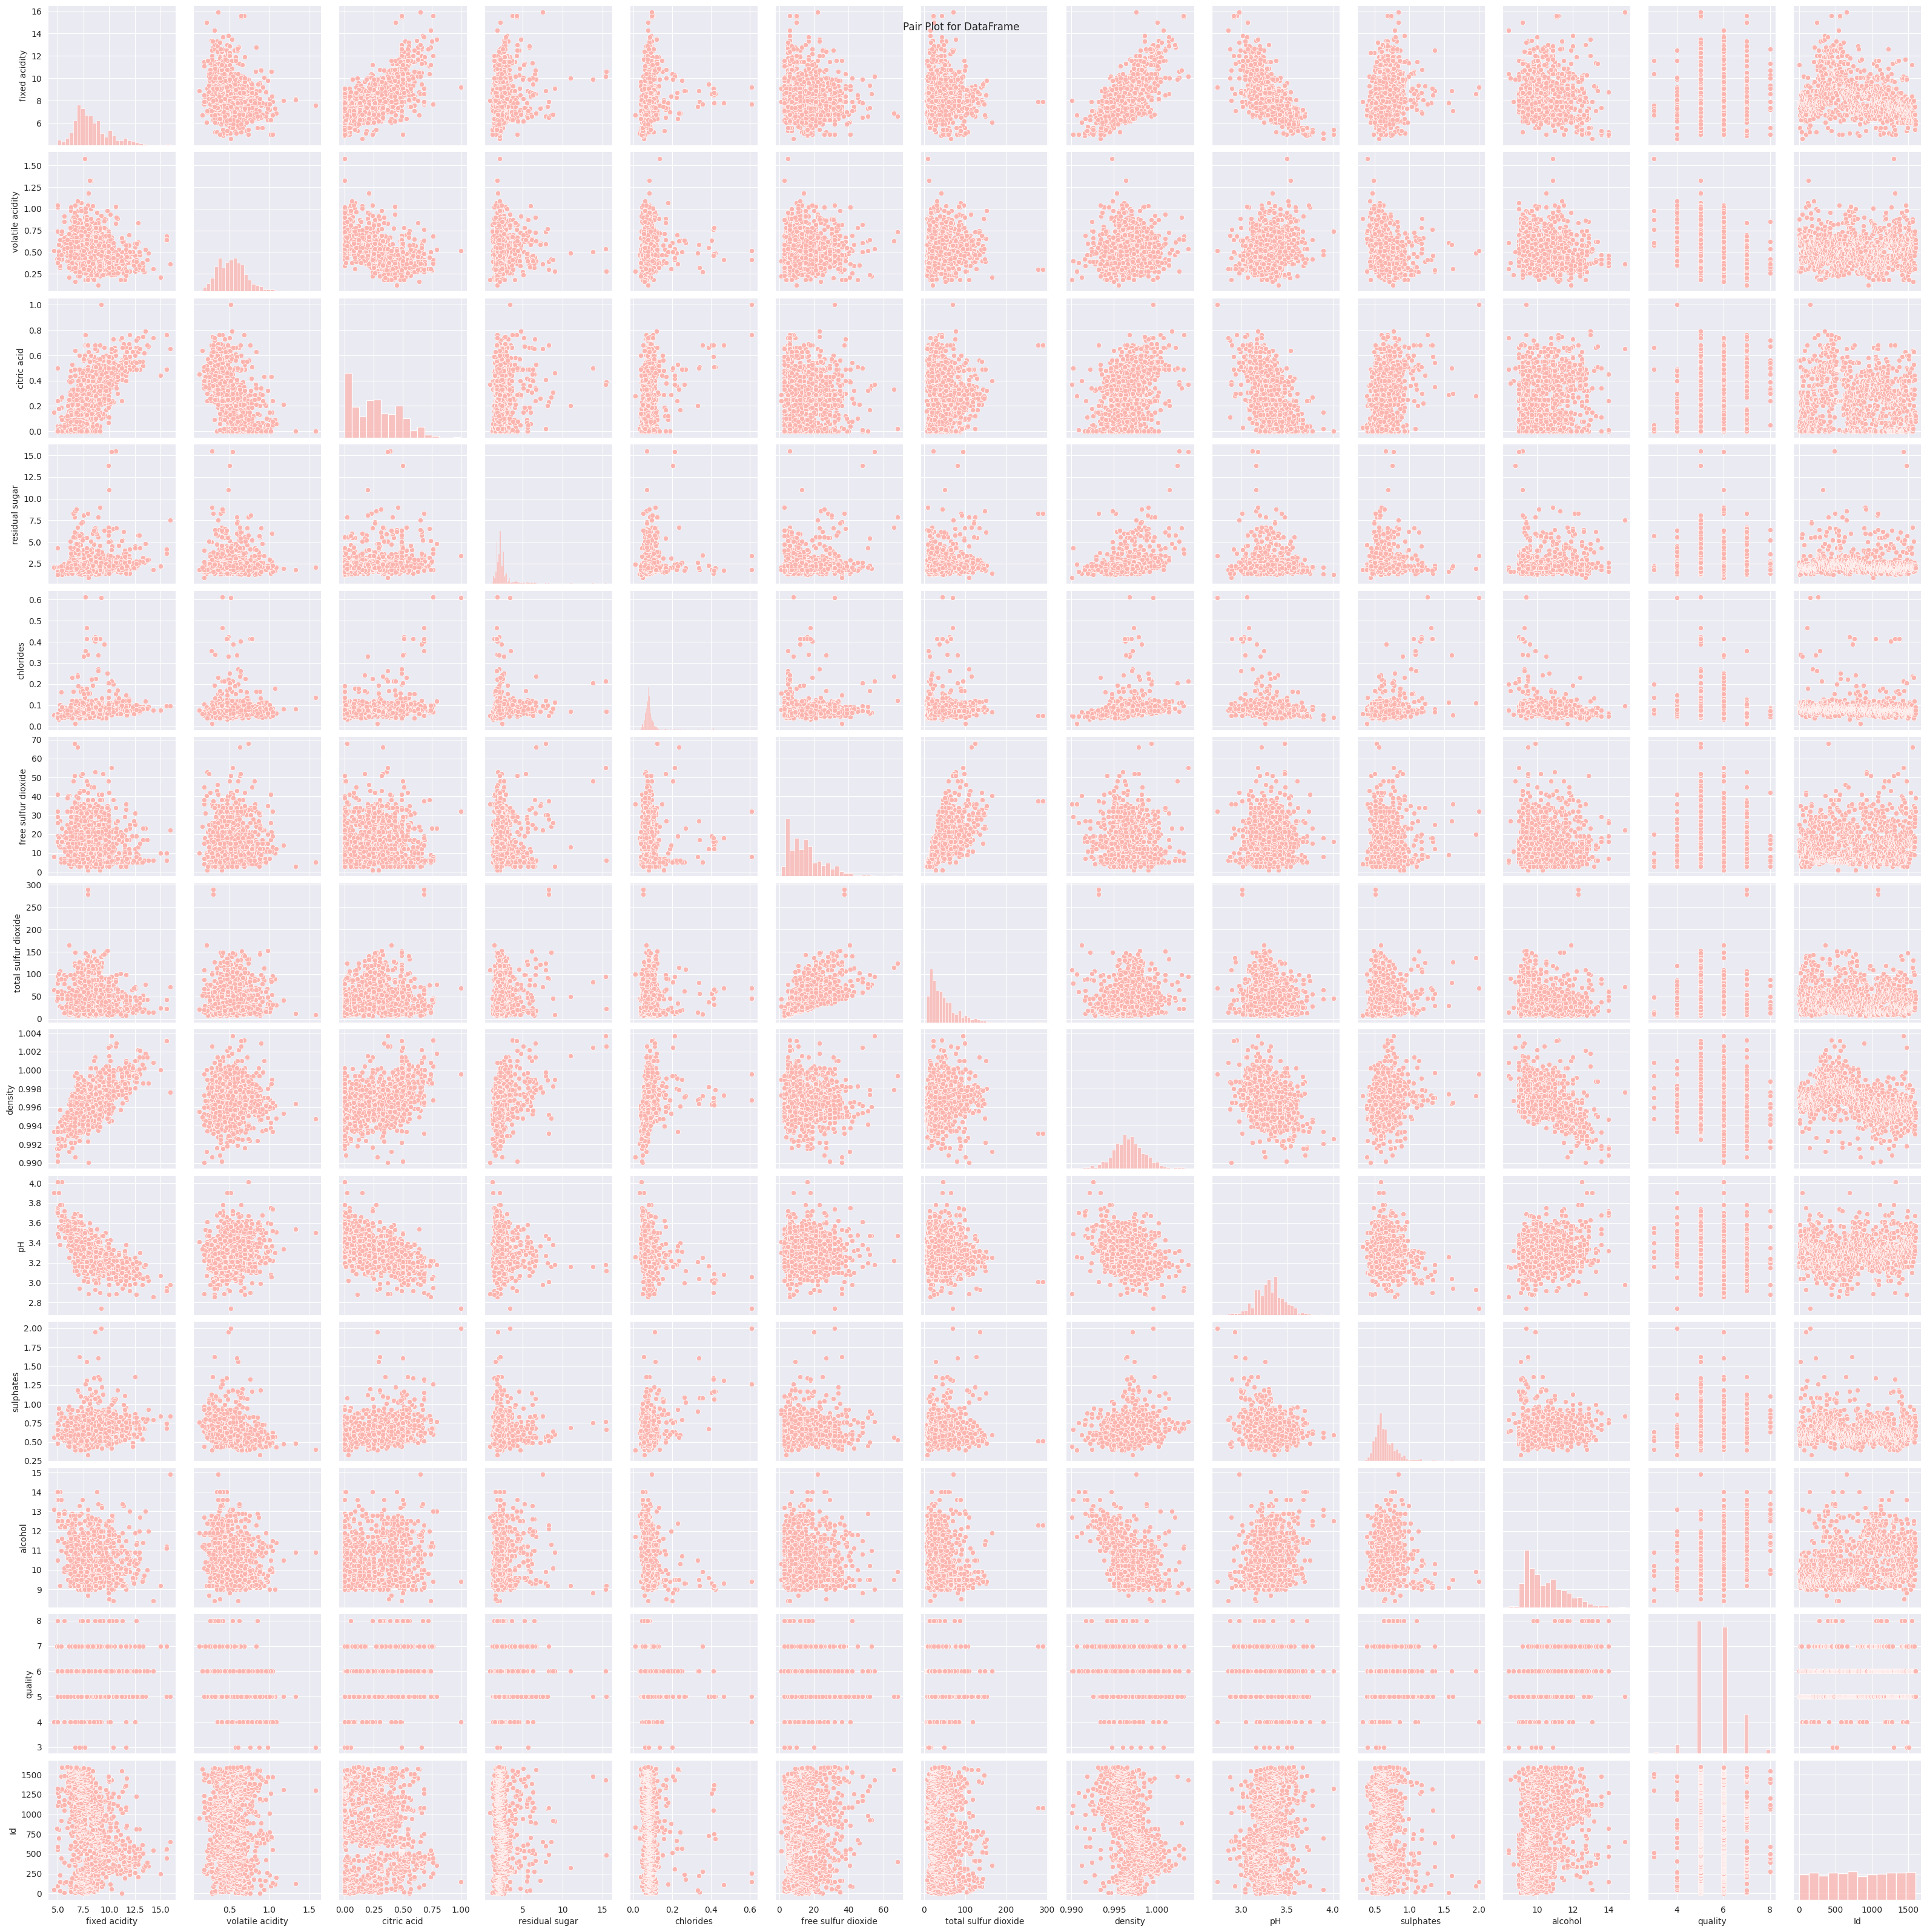

In [20]:
sns.set_palette("Pastel1")

plt.figure(figsize=(10, 6))

sns.pairplot(df)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

Violin Plot for examining the relationship between alcohol and Quality.

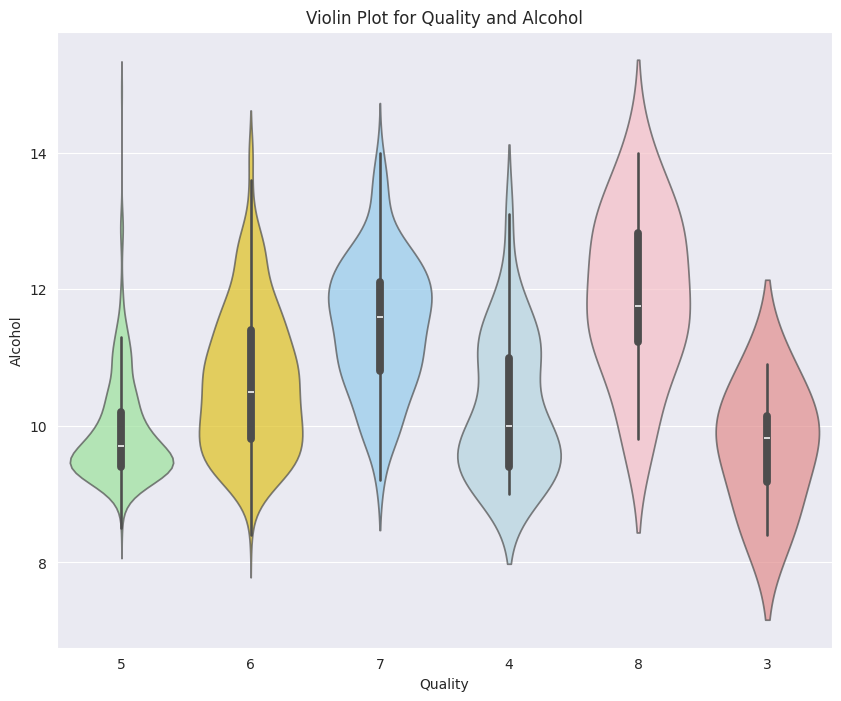

In [21]:
df['quality'] = df['quality'].astype(str)

plt.figure(figsize=(10, 8))

sns.violinplot(x="quality", y="alcohol", data=df, palette={
               '3': 'lightcoral', '4': 'lightblue', '5': 'lightgreen', '6': 'gold', '7': 'lightskyblue', '8': 'lightpink'}, alpha=0.7)

plt.title('Violin Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

Box Plot for examining the relationship between alcohol and Quality

<Axes: xlabel='quality', ylabel='alcohol'>

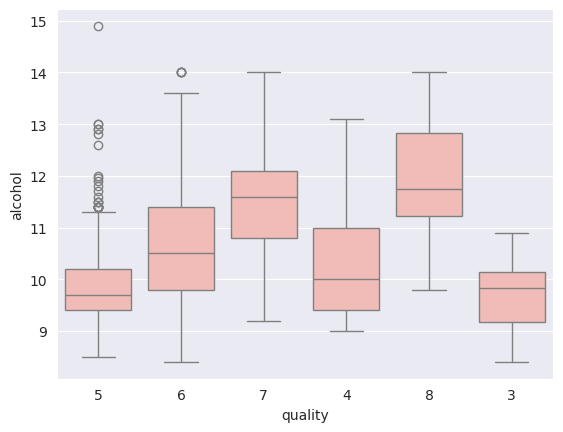

In [22]:
sns.boxplot(x='quality', y='alcohol', data=df)

Multivariate Analysis for (understanding complex relationships and patterns among multiple variables effectively)

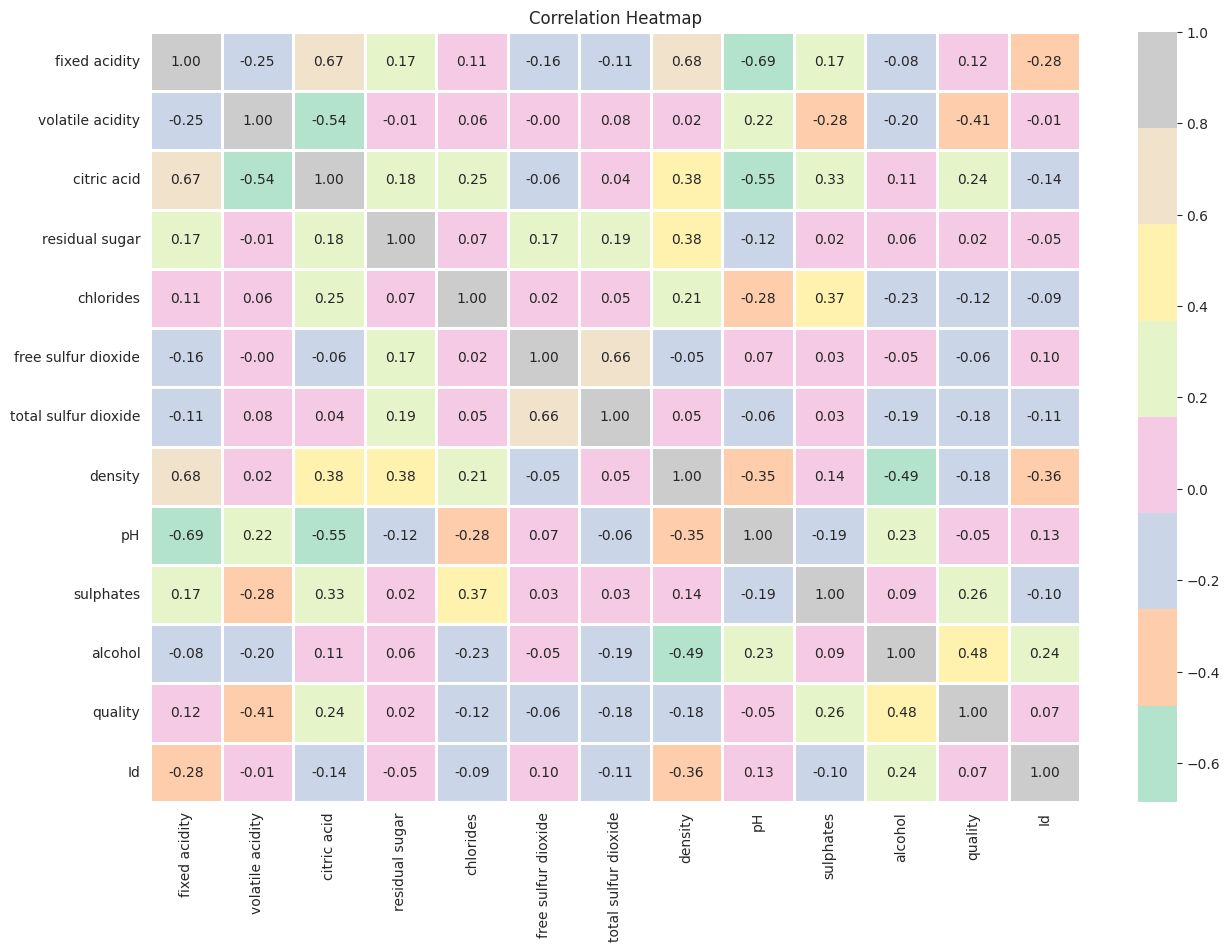

In [23]:
plt.figure(figsize=(15, 10))

sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()